In [1]:
# -*- incoding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time as t

In [2]:
covid19 = []
date = []
xl=pd.ExcelFile("covid.xls")
df=xl.parse('Sheet1')
for day in df['날짜']:
    date.append((str(day)[5:7] + '/' + str(day)[8:10]))
for i, d in enumerate(date):
    covid19.append({'date': d, 'people': df['일별확진자수'][i]})
covid19
# covid19 = [
#     {'date': '04/25', 'people': 10},
#     {'date': '04/26', 'people': 10},
#     {'date': '04/27', 'people': 10},
#     {'date': '04/28', 'people': 14},
#     {'date': '04/29', 'people': 9},
#     {'date': '04/30', 'people': 4},
#     {'date': '05/01', 'people': 4},
# ]

[{'date': '04/25', 'people': 10},
 {'date': '04/26', 'people': 10},
 {'date': '04/27', 'people': 10},
 {'date': '04/28', 'people': 14},
 {'date': '04/29', 'people': 9},
 {'date': '04/30', 'people': 4},
 {'date': '05/01', 'people': 4}]

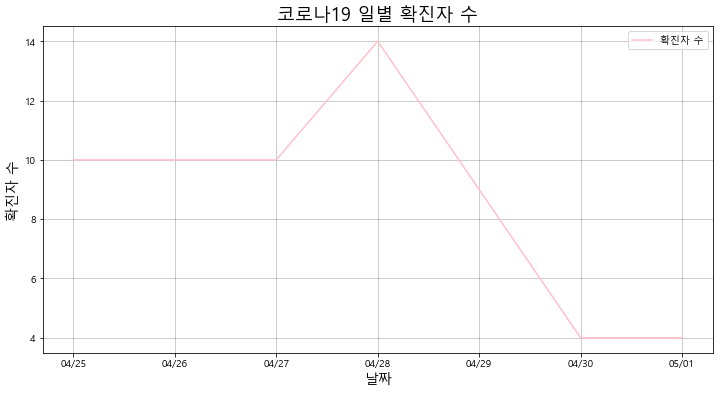

In [3]:
plt.rc('font', family='Malgun Gothic')

date = []
people = []
for day in covid19:
    date.append(day['date'])
    people.append(day['people'])
    
plt.figure(figsize = (12, 6))
plt.plot(date, people, color='pink', label='확진자 수')
plt.grid(True, color='gray', alpha=0.5)
plt.xlabel('날짜',fontsize=14)
plt.ylabel('확진자 수',fontsize=14)
plt.title('코로나19 일별 확진자 수',fontsize='18')
plt.legend()

## [문제2] 누적 확진자 수와 누적 격리해제에 대한 시각화하기

In [4]:
covid19 = {}
date = []
xl=pd.ExcelFile("covid.xls")
df=xl.parse('Sheet1')
for day in df['날짜']:
    date.append((str(day)[5:7] + '/' + str(day)[8:10]))
for i, d in enumerate(date):
    covid19.update({d: {'확진': df['누적환자수'][i], '격리해제': df['누적격리해제'][i]}})
covid19
# covid19 = {
#     '04/25': {"확진": 10718, '격리해제': 8635},
#     '04/26': {"확진": 10728, '격리해제': 8717},
#     '04/27': {"확진": 10738, '격리해제': 8764},
#     '04/28': {"확진": 10752, '격리해제': 8854},
#     '04/29': {"확진": 10761, '격리해제': 8922},
#     '04/30': {"확진": 10765, '격리해제': 9059},
#     '05/01': {"확진": 10774, '격리해제': 9072},
# }

{'04/25': {'확진': 10718, '격리해제': 8635},
 '04/26': {'확진': 10728, '격리해제': 8717},
 '04/27': {'확진': 10738, '격리해제': 8764},
 '04/28': {'확진': 10752, '격리해제': 8854},
 '04/29': {'확진': 10761, '격리해제': 8922},
 '04/30': {'확진': 10765, '격리해제': 9059},
 '05/01': {'확진': 10744, '격리해제': 9072}}

Text(0.5, 1.0, '코로나19 확진, 격리해제 추세')

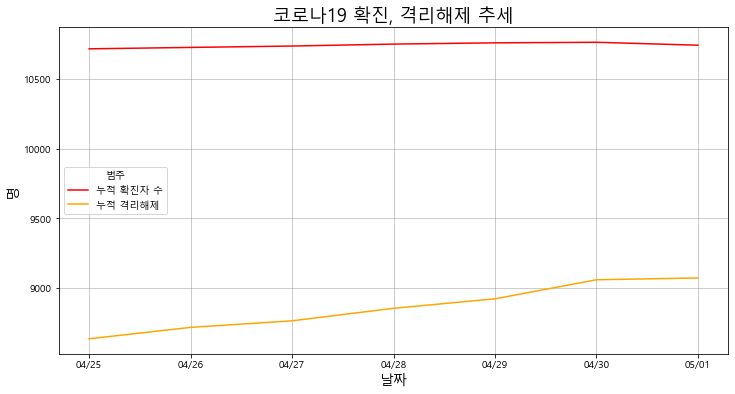

In [5]:
date = []
hak = []
kyeok = []
for day in covid19.items():
    date.append(day[0])
    hak.append(day[1]['확진'])
    kyeok.append(day[1]['격리해제'])

plt.figure(figsize = (12, 6))
plt.plot(date, hak, label='누적 확진자 수', color='red')
plt.plot(date, kyeok, label='누적 격리해제', color='orange')
plt.legend(loc="center left", title='범주')
plt.grid(True, color='gray', alpha=0.5)
plt.xlabel('날짜',fontsize=14)
plt.ylabel('명',fontsize=14)
plt.title('코로나19 확진, 격리해제 추세',fontsize='18')

## [문제3] 연령대별 확진자 수 시각화하기

In [6]:
xl=pd.ExcelFile("covid.xls")    
df=xl.parse('Sheet2')
covid19 = dict(zip(df['구분'], df['확진자(명)']))
covid19
# covid19 = {
#     "80이상": 488,
#     "70~79": 710,
#     "60~69": 1351,
#     "50~59": 1956,
#     "40~49": 1432,
#     "30~39": 1163,
#     "20~29": 2962,
#     "10~19": 591,
#     "0~9": 140,
# }

{'80이상': 488,
 '70-79': 710,
 '60-69': 1351,
 '50-59': 1956,
 '40-49': 1432,
 '30-39': 1163,
 '20-29': 2962,
 '10-19': 591,
 '0-9': 140}

Text(0.5, 1.0, '코로나19 연령대별 확진자 수')

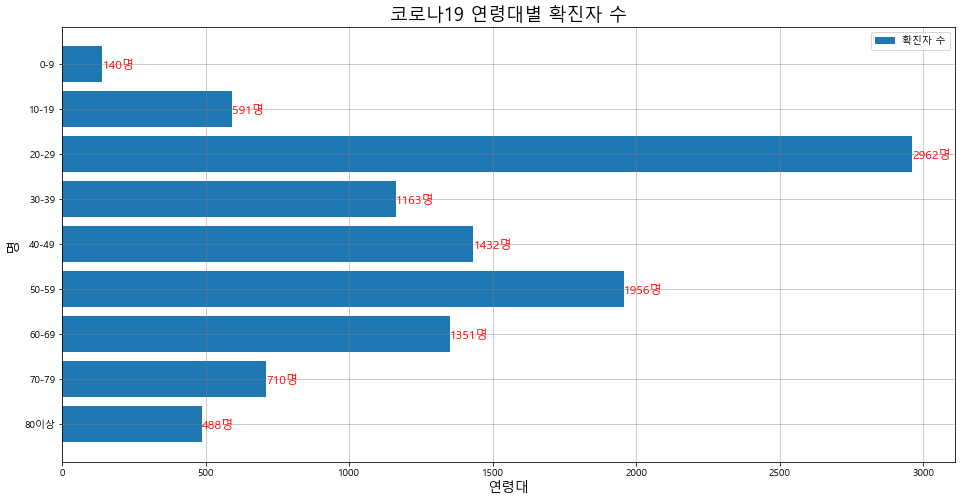

In [7]:
age = []
people = []
for day in covid19.items():
    age.append(day[0])
    people.append(day[1])

plt.figure(figsize = (16,8))
for i in range(len(age)):
    plt.text(people[i], i-0.1, f"{people[i]}명", color='red', size='large')
plt.barh(age, people, label='확진자 수')
plt.legend(loc="best")
plt.grid(True, color='gray', alpha=0.5)
plt.xlabel('연령대',fontsize=14)
plt.ylabel('명',fontsize=14)
plt.title('코로나19 연령대별 확진자 수',fontsize='18')

## [문제4] 연령대별 확진/사망자 수 시각화하기

In [8]:
date = []
people = []
covid19 = {}
xl=pd.ExcelFile("covid.xls")    
df=xl.parse('Sheet2')
for i in range(df['구분'].size):
    covid19.update({df['구분'][i]: {'확진': df['확진자(명)'][i], '사망': df['사망자(명)'][i]}})
covid19
# covid19 = {
#     "80이상": {"확진": 488, "사망": 120},
#     "70~79": {"확진": 710, "사망": 75},
#     "60~69": {"확진": 1351, "사망": 35},
#     "50~59": {"확진": 1956, "사망": 15},
#     "40~49": {"확진": 1432, "사망": 3},
#     "30~39": {"확진": 1163, "사망": 2},
#     "20~29": {"확진": 2962, "사망": 0},
#     "10~19": {"확진": 591, "사망": 0},
#     "0~9": {"확진": 140, "사망": 0},
# }

{'80이상': {'확진': 488, '사망': 120},
 '70-79': {'확진': 710, '사망': 75},
 '60-69': {'확진': 1351, '사망': 35},
 '50-59': {'확진': 1956, '사망': 15},
 '40-49': {'확진': 1432, '사망': 3},
 '30-39': {'확진': 1163, '사망': 2},
 '20-29': {'확진': 2962, '사망': 0},
 '10-19': {'확진': 591, '사망': 0},
 '0-9': {'확진': 140, '사망': 0}}

([<matplotlib.axis.XTick at 0x226ae154a48>,
 <a list of 9 Text xticklabel objects>)

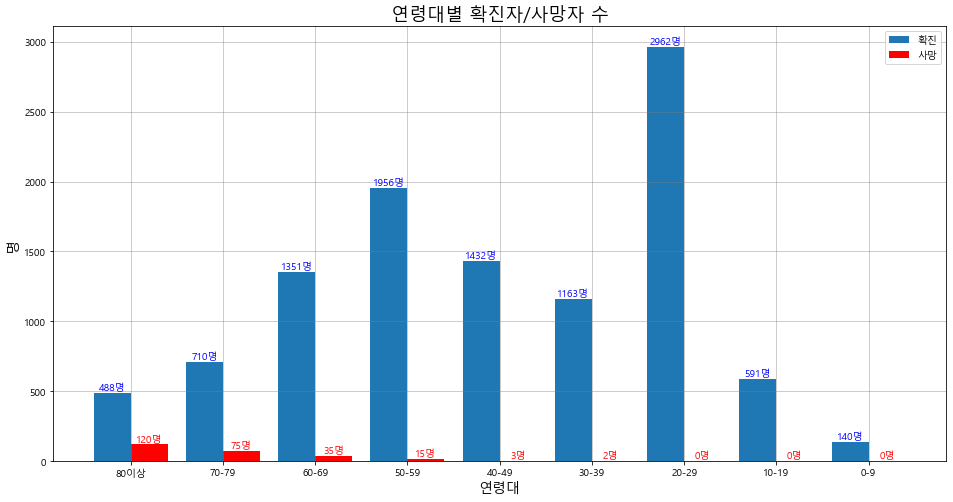

In [9]:
bar_width = 0.4
age = []
live = []
dead = []
for day in covid19.items():
    age.append(day[0])
    live.append(day[1]['확진'])
    dead.append(day[1]['사망'])
x = np.arange(0, len(age))   
    
plt.figure(figsize = (16, 8))
for i in range(len(age)):
    plt.text(i-0.2, live[i]+20, f'{live[i]}명', size='medium', ha='center', color='blue')
    plt.text(i+0.2, dead[i]+20, f'{dead[i]}명', size='medium', ha='center', color='red')
plt.bar(x-0.2, live, bar_width, label='확진')
plt.bar(x+0.2, dead, bar_width, label='사망', color='red')
plt.legend(loc="best")
plt.grid(True, color='gray', alpha=0.5)
plt.xlabel('연령대',fontsize=14)
plt.ylabel('명',fontsize=14)
plt.title('연령대별 확진자/사망자 수',fontsize='18')
plt.xticks(x, labels=age)

## [문제5] 연령대별 확진비율 시각화하기

In [10]:
covid19

{'80이상': {'확진': 488, '사망': 120},
 '70-79': {'확진': 710, '사망': 75},
 '60-69': {'확진': 1351, '사망': 35},
 '50-59': {'확진': 1956, '사망': 15},
 '40-49': {'확진': 1432, '사망': 3},
 '30-39': {'확진': 1163, '사망': 2},
 '20-29': {'확진': 2962, '사망': 0},
 '10-19': {'확진': 591, '사망': 0},
 '0-9': {'확진': 140, '사망': 0}}

Text(0.5, 1.0, '연령대별 확진 비율')

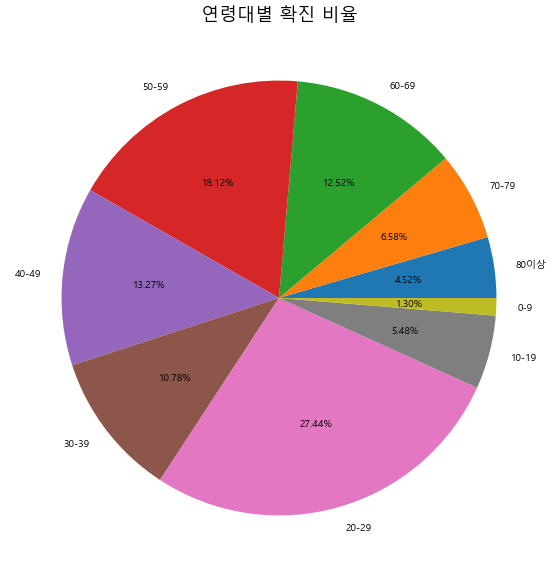

In [11]:
age = []
live = []
for day in covid19.items():
    age.append(day[0])
    live.append(day[1]['확진'])
    
plt.figure(figsize = (10, 10))
plt.pie(live, labels=age, autopct='%1.2f%%')
plt.title('연령대별 확진 비율',fontsize='18')


## [문제6] 교통 사고 통계 분석 시각화 하기

#### 1) 데이터 가져오기

In [12]:
import numpy
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot as plt

data=read_csv('traffic.csv', encoding='cp949')
data

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


#### 2) 데이터 전처리 하기

In [13]:
data_for_year = []
for i in range(2005, 2018+1):
    year = data[data["년도"] == i]
    data_for_year.append([i, sum(year['발생건수']), sum(year['사망자수']), sum(year['부상자수'])])
df = DataFrame(data_for_year, columns=['년도','발생건수','사망자수', '부상자수'])
df

,년도,발생건수,사망자수,부상자수
0,2005,214171,6376,342233
1,2006,213745,6327,340229
2,2007,211662,6166,335906
3,2008,215822,5870,338962
4,2009,231990,5838,361875
5,2010,226878,5505,352458
6,2011,221711,5229,341391
7,2012,223656,5392,344565
8,2013,215354,5092,328711
9,2014,223552,4762,337497


#### 3) 년도별 교통사고 발생현황 시각화 하기

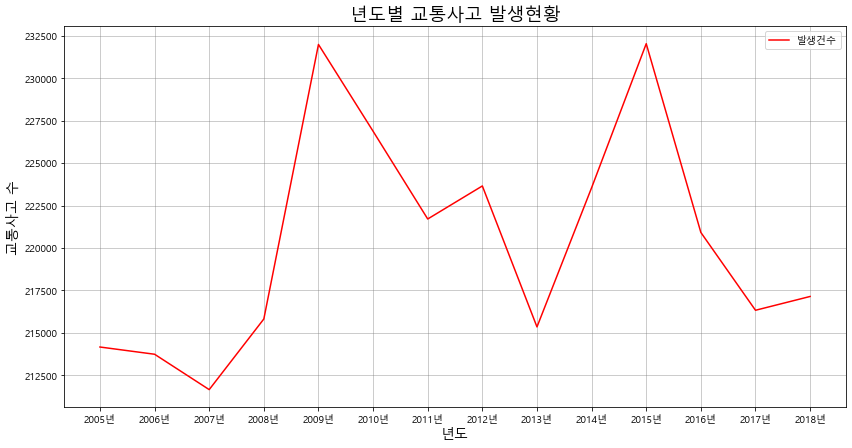

In [14]:
plt.figure(figsize = (14, 7))
plt.plot(df['년도'], df['발생건수'], color='red', label='발생건수')
plt.grid(True, color='gray', alpha=0.5)
plt.xlabel('년도',fontsize=14)
plt.ylabel('교통사고 수',fontsize=14)
plt.title('년도별 교통사고 발생현황',fontsize='18')
plt.xticks(df['년도'], labels=map(lambda x: f'{x}년', df['년도']))
plt.legend()

#### 4) 년도별 교통사고 발생현황 시각화 하기


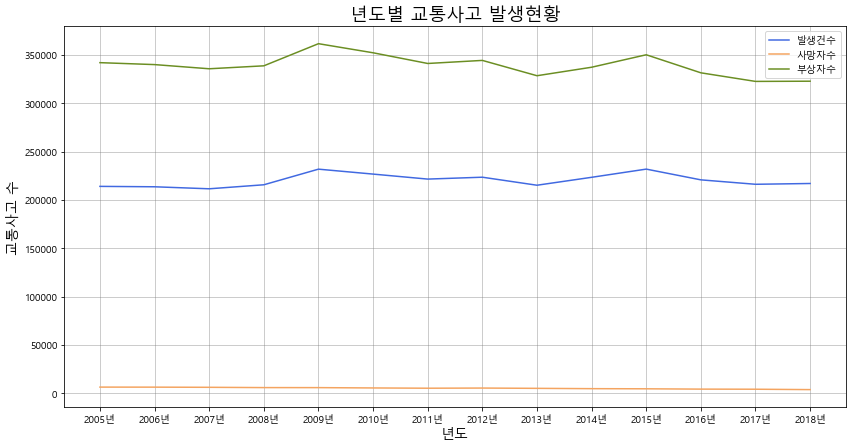

In [15]:
plt.figure(figsize = (14, 7))
plt.plot(df['년도'], df['발생건수'], color='RoyalBlue', label='발생건수')
plt.plot(df['년도'], df['사망자수'], color='SandyBrown', label='사망자수')
plt.plot(df['년도'], df['부상자수'], color='OliveDrab', label='부상자수')
plt.grid(True, color='gray', alpha=0.5)
plt.xlabel('년도',fontsize=14)
plt.ylabel('교통사고 수',fontsize=14)
plt.title('년도별 교통사고 발생현황',fontsize='18')
plt.xticks(df['년도'], labels=map(lambda x: f'{x}년', df['년도']))
plt.legend()

#### 5) 추세선을 포함한 산점도 그래프 그리기

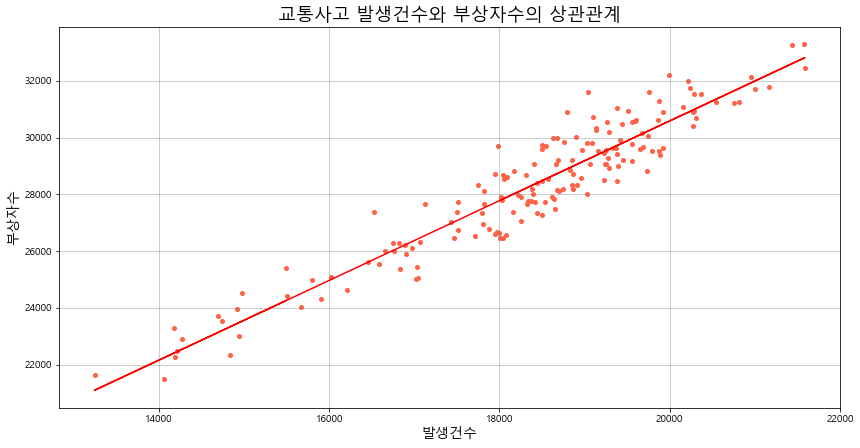

In [32]:
from matplotlib.pylab import plot

plt.figure(figsize = (14, 7))
plt.scatter(data['발생건수'], data['부상자수'], s=16, c='Tomato')
plt.grid(True, color='gray', alpha=0.5)
plt.xlabel('발생건수',fontsize=14)
plt.ylabel('부상자수',fontsize=14)
plt.title('교통사고 발생건수와 부상자수의 상관관계',fontsize='18')

z = np.polyfit(data['발생건수'], data['부상자수'], 1) # (X, Y, 차원)
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화
plot(data['발생건수'] ,p(data['발생건수']), c='r')
plt.show()